In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# **Exploring Dataset**

Importing dataset using Pandas

In [340]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


`ocean_proximity` cannot be fed directly into the model as it is not in the appropriate format
This feature will need to be engineered to make it usable with the model 

In [341]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Not all the numbers are the same 
- Some values are missing 
- Null values will be dropped since in this case it's not many of them

- Dropped null values and saved in the data file

In [342]:
data.dropna(inplace=True)

- Now they are all the same and there is no missing data

In [343]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


- Splitting data into features `X` and labels `y`

In [344]:
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

- Splitting data into training set and test set

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

- Combining the features `X` and labels `y` for both the training set and test set but independently (to avoid leakage)
- Allowing the exploration of the training set and making adjustments

In [346]:
train_data = X_train.join(y_train)
test_data = X_test.join(y_test)

**One-Hot encoding** the `ocean_proximity` column as the string data is not appropriate for the model.

The purpose of **One-Hot Encoding** is to convert categorical data into a numerical format that can be used for Machine Learning algorithms.
It creates a binary column for each category in the data, where each observation is marked with a 1 in the column for its corresponding category and 0 in the other columns. This allows the Machine Learning algorithms to understand the categorical data as numerical data and make predications based on it. It also prevents ordering from being introduces into the data which can affect the model predictions. 

In [347]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

Renaming the columns as the names are inconsistent and some have special characters that are not valid. 

In [348]:
column_names = {
	'<1H OCEAN': 'ocean_proximity_less_than_one_hour',
	'INLAND': 'ocean_proximity_inland',
	'ISLAND': 'ocean_proximity_island',
	'NEAR BAY': 'ocean_proximity_near_bay',
	'NEAR OCEAN': 'ocean_proximity_near_ocean'
}

train_data = train_data.rename(columns=column_names)
test_data = test_data.rename(columns=column_names)

In [349]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_less_than_one_hour,ocean_proximity_inland,ocean_proximity_island,ocean_proximity_near_bay,ocean_proximity_near_ocean
20274,-119.23,34.15,18.0,6213.0,1188.0,2679.0,1000.0,3.7480,380400.0,False,False,False,False,True
15280,-117.30,33.06,24.0,2171.0,511.0,870.0,442.0,3.1940,276300.0,False,False,False,False,True
18343,-122.15,37.43,47.0,2600.0,490.0,1149.0,465.0,5.0203,476300.0,False,False,False,True,False
9455,-123.47,39.80,18.0,2130.0,545.0,863.0,346.0,2.3571,79200.0,False,True,False,False,False
15861,-122.39,37.76,52.0,3390.0,691.0,1645.0,596.0,3.7051,253700.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9937,-122.21,38.28,35.0,1273.0,210.0,555.0,181.0,4.4861,269300.0,False,False,False,True,False
8413,-118.35,33.94,36.0,2225.0,601.0,2755.0,610.0,2.5547,150400.0,True,False,False,False,False
11412,-117.95,33.69,24.0,4269.0,618.0,1954.0,597.0,6.9261,284600.0,True,False,False,False,False
9694,-121.63,36.68,24.0,2591.0,739.0,3243.0,702.0,2.1766,108500.0,True,False,False,False,False


The data below is skewed 
This data does not follow a Normal Distribution (Standard Gaussian Distribution)
The data will be processed such that it follows the required distribution

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

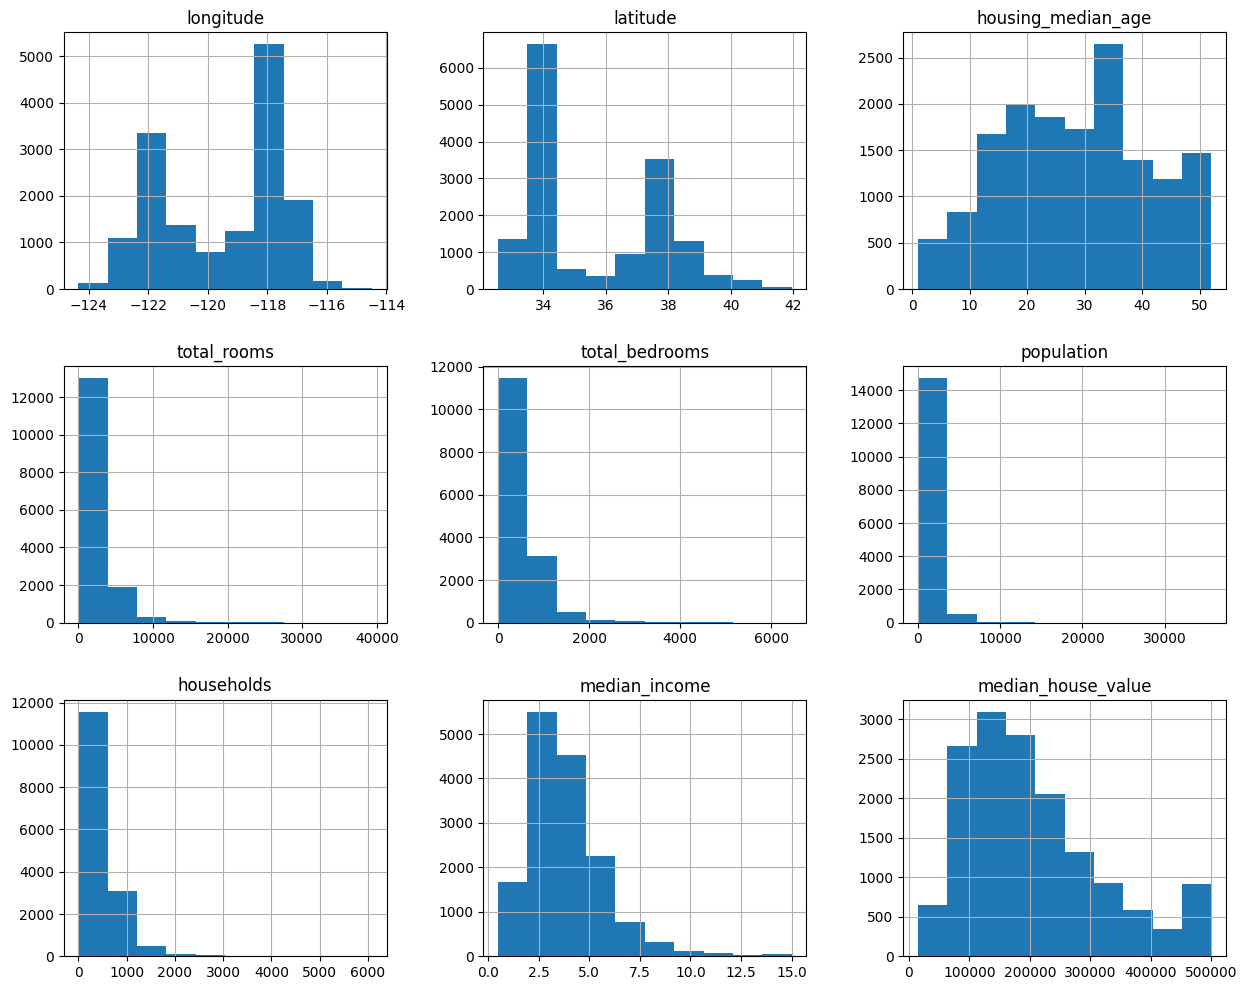

In [350]:
train_data.hist(figsize=(15, 12))

**Correlation Matrix** 

In [351]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_less_than_one_hour,ocean_proximity_inland,ocean_proximity_island,ocean_proximity_near_bay,ocean_proximity_near_ocean
longitude,1.000000,-0.924182,-0.111837,0.043778,0.067645,0.097039,0.053974,-0.014744,-0.049178,0.320611,-0.058946,0.008727,-0.477606,0.057465
latitude,-0.924182,1.000000,0.015838,-0.035368,-0.065692,-0.107836,-0.070169,-0.081629,-0.142304,-0.445574,0.355164,-0.015003,0.359454,-0.172653
housing_median_age,-0.111837,0.015838,1.000000,-0.359295,-0.316664,-0.291339,-0.299599,-0.120440,0.105250,0.042068,-0.234563,0.016722,0.260666,0.017539
total_rooms,0.043778,-0.035368,-0.359295,1.000000,0.930543,0.850921,0.917415,0.200825,0.133592,-0.000455,0.027318,-0.006201,-0.027928,-0.010705
total_bedrooms,0.067645,-0.065692,-0.316664,0.930543,1.000000,0.871383,0.979341,-0.005975,0.049451,0.020601,-0.007011,-0.002648,-0.021650,-0.000201
population,0.097039,-0.107836,-0.291339,0.850921,0.871383,1.000000,0.901625,0.005554,-0.027086,0.076820,-0.020807,-0.008597,-0.063210,-0.024673
households,0.053974,-0.070169,-0.299599,0.917415,0.979341,0.901625,1.000000,0.013674,0.064339,0.044109,-0.039200,-0.007059,-0.012694,0.001534
median_income,-0.014744,-0.081629,-0.120440,0.200825,-0.005975,0.005554,0.013674,1.000000,0.688547,0.171485,-0.236350,-0.009590,0.054228,0.024285
median_house_value,-0.049178,-0.142304,0.105250,0.133592,0.049451,-0.027086,0.064339,0.688547,1.000000,0.250628,-0.483768,0.028090,0.165357,0.144670
ocean_proximity_less_than_one_hour,0.320611,-0.445574,0.042068,-0.000455,0.020601,0.076820,0.044109,0.171485,0.250628,1.000000,-0.604577,-0.012336,-0.314068,-0.340751


**Correlation Heatmap**

<Axes: >

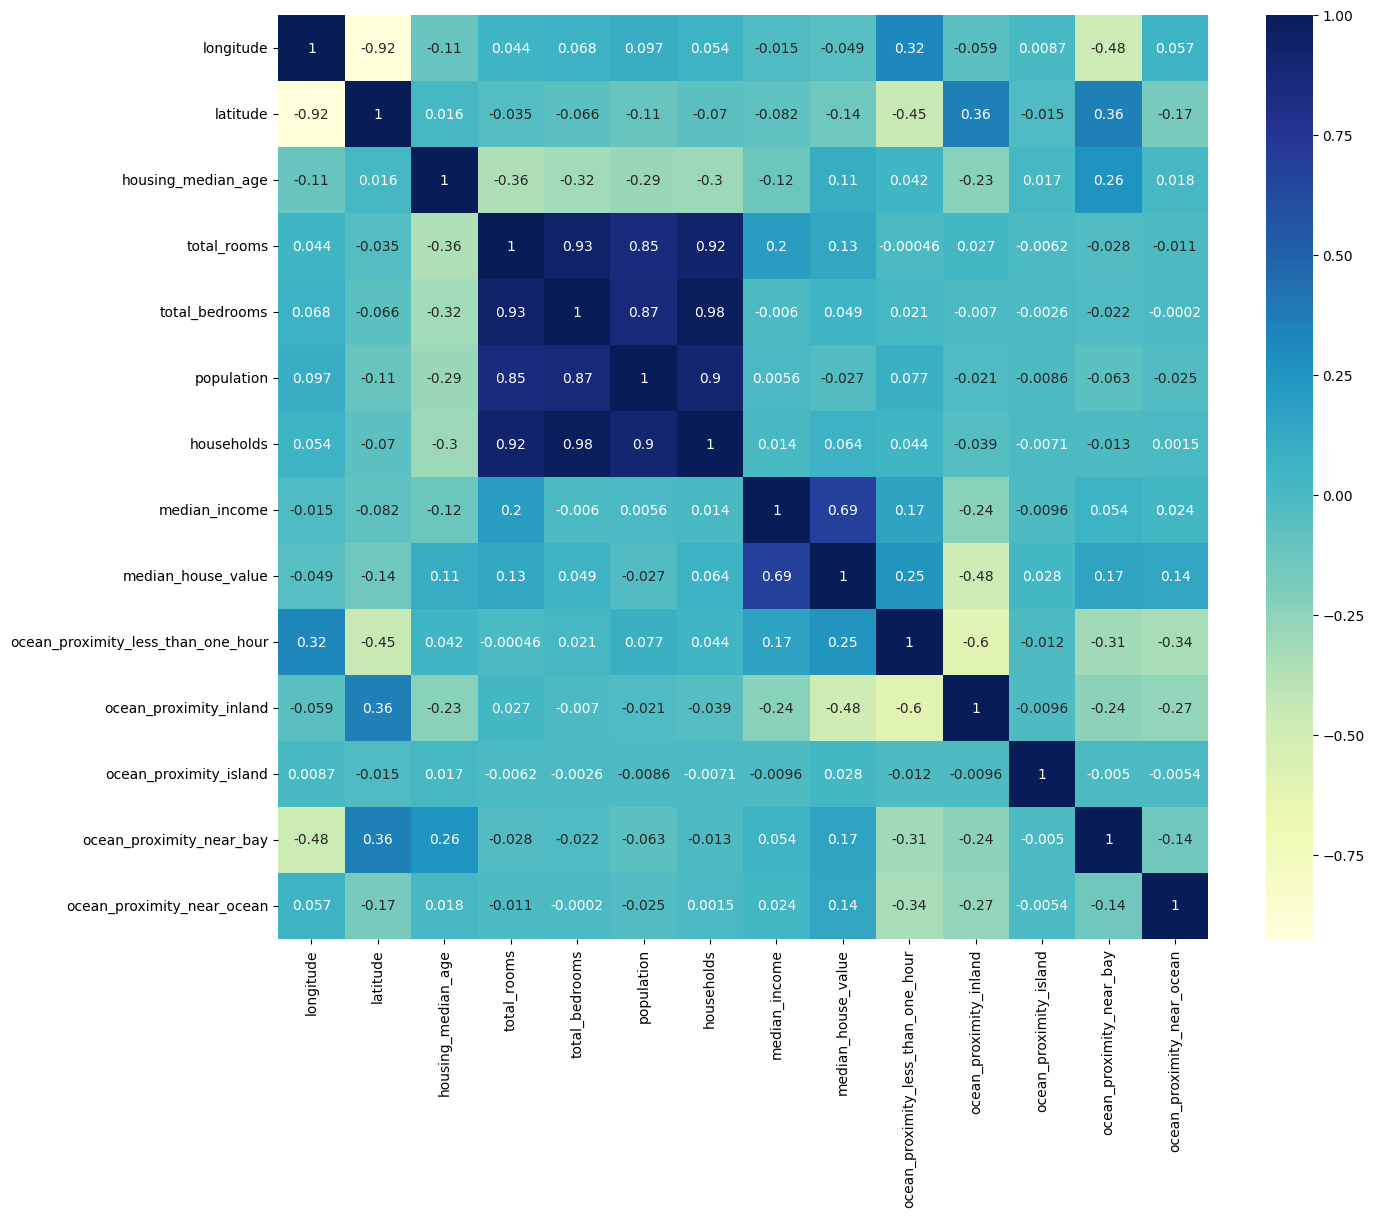

In [352]:
plt.figure(figsize=(15, 12))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

Houses near the cost are generally more expensive

<Axes: xlabel='latitude', ylabel='longitude'>

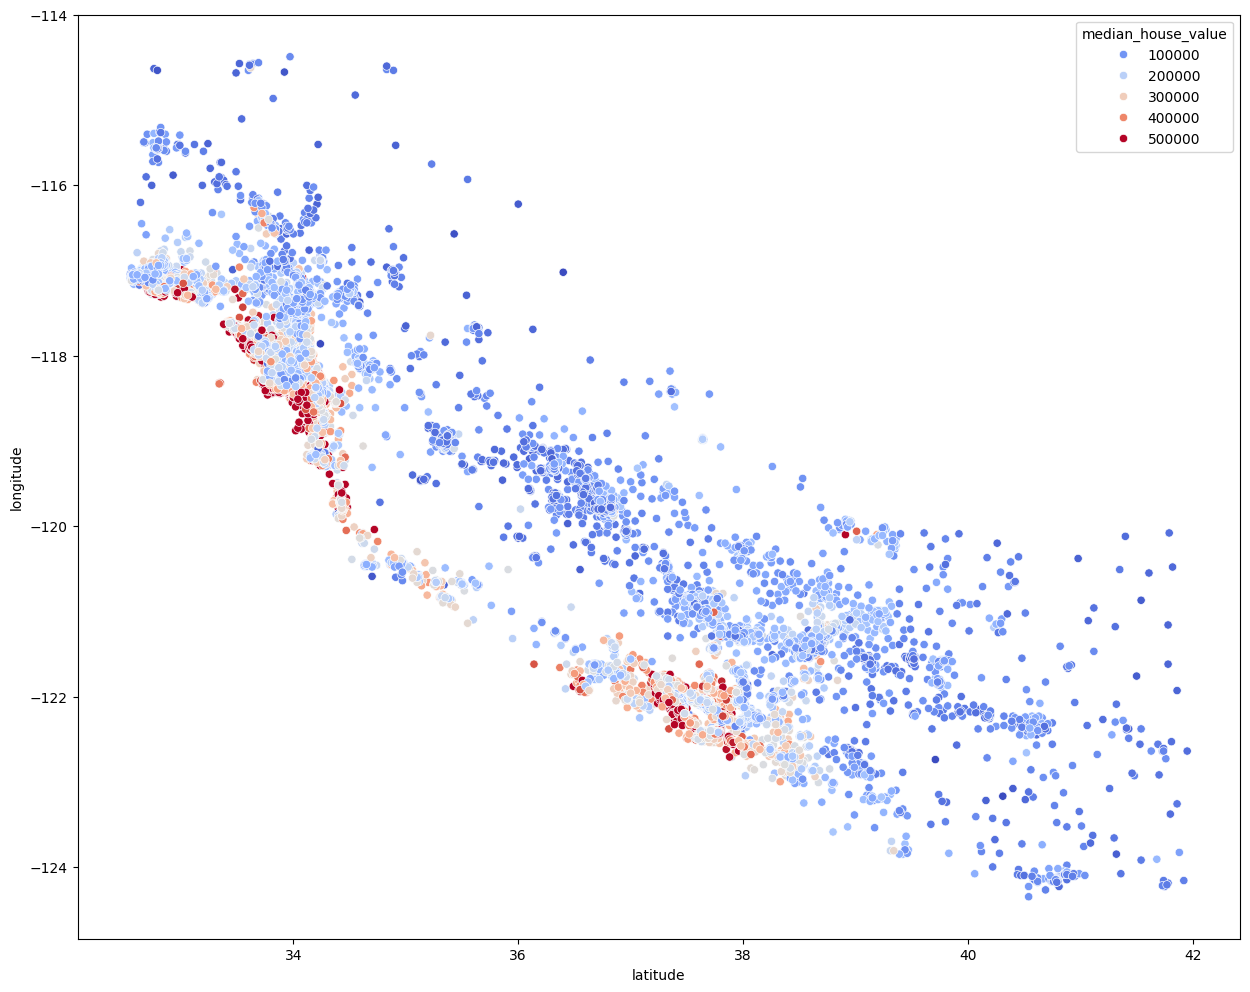

In [353]:
plt.figure(figsize=(15, 12))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

## **Combining Features**

Combining features in machine learning refers to the process of creating new features by combining existing ones. It is useful because it can help improve the performance of a machine learning model by providing it with more relevant and informative data to learn from.

Working out the ratio of bedrooms in relation to the total number of bedrooms 

In [354]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']

Working out the ratio of rooms in relation to each household

In [355]:
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

Correlation heatmap with the new combined features.
The 2 combined features are more useful then the separate ones. 

<Axes: >

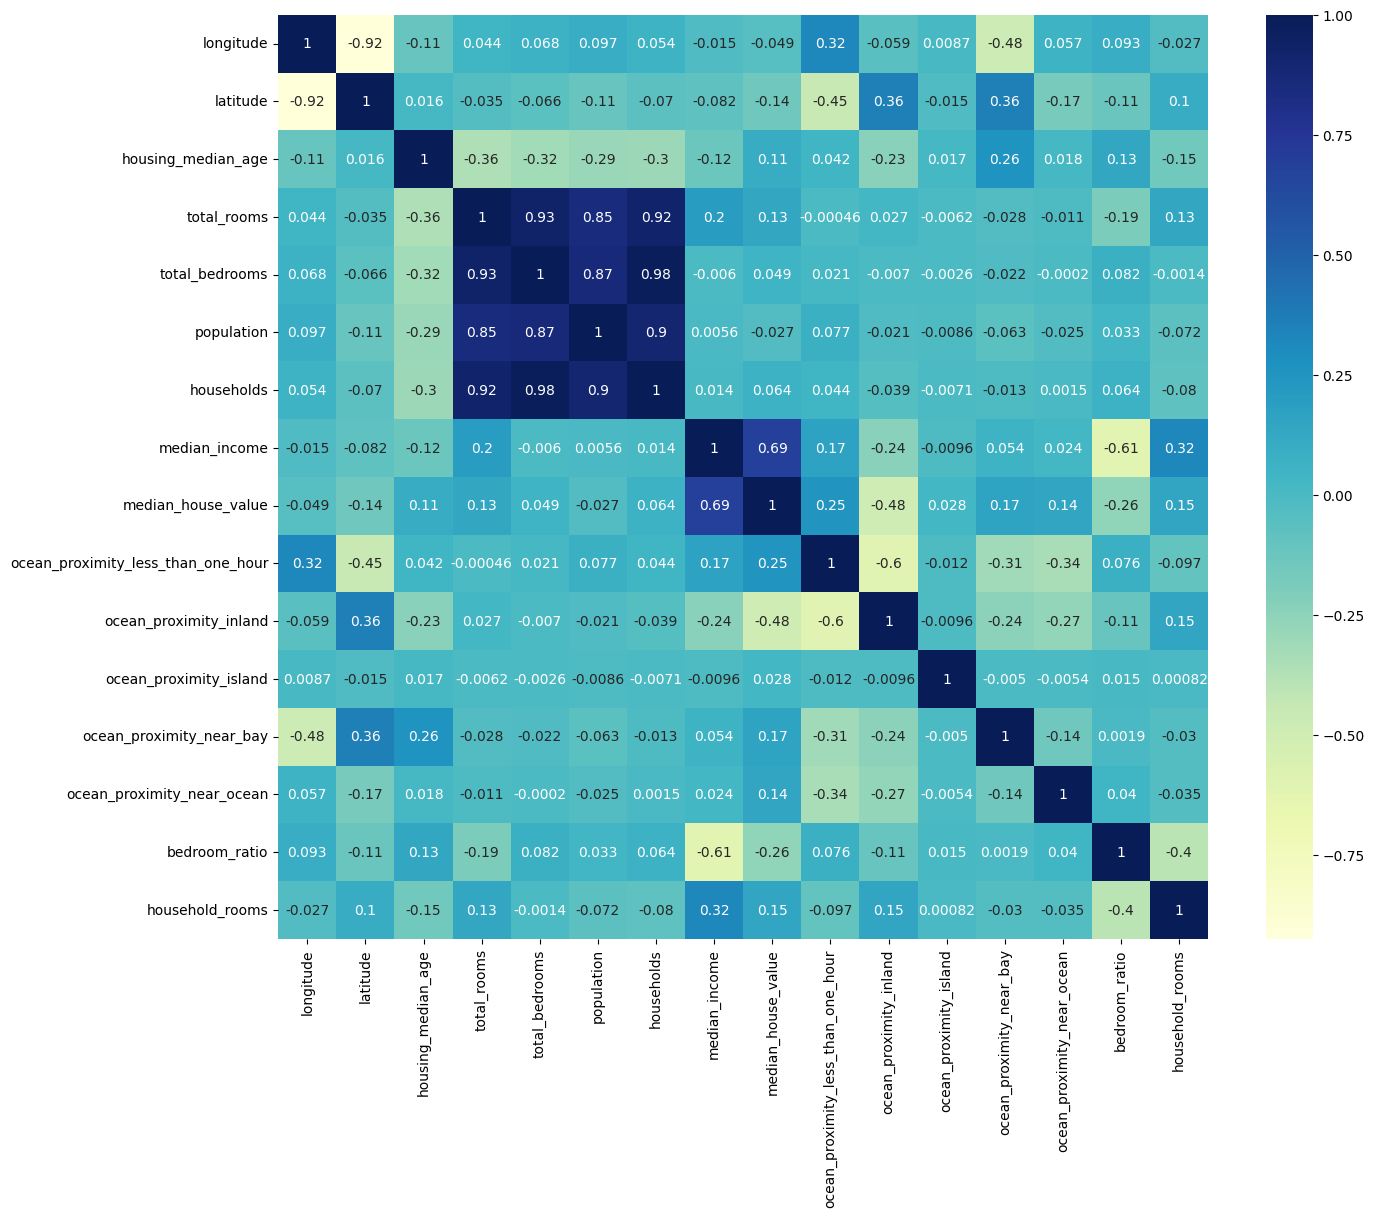

In [356]:
plt.figure(figsize=(15, 12))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

# **Pre-Processing Data**

Data preprocessing is the process of cleaning and transforming raw data into a format that is suitable for analysis. It is important because it can help improve the accuracy and effectiveness of machine learning models by removing noise, handling missing data, and normalizing the data.

Applying logarithm to the data to see if it follows a Normal Distribution

In [357]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

After applying the log formal, the graphs seem to be closer to a Normal Distribution
The data follows a Log-Normal Distribution

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'bedroom_ratio'}>,
        <Axes: title={'center': 'household_rooms'}>, <Axes: >]],
      dtype=object)

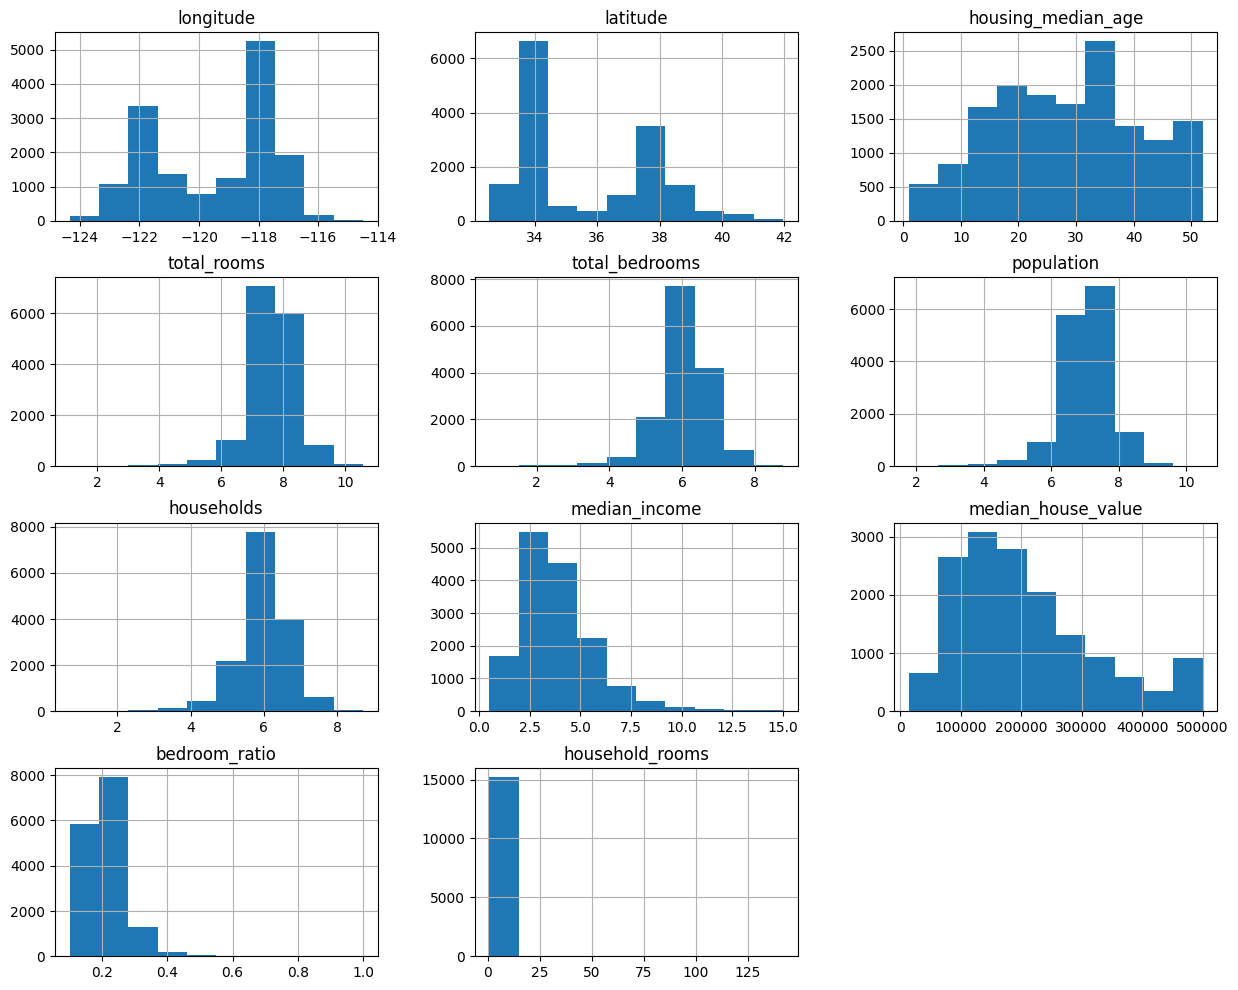

In [358]:
train_data.hist(figsize=(15,12))

In [359]:
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

# **Training Model**

## **Linear Regressor**

A linear regressor is a type of machine learning algorithm that is used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the data. 
It is used because it is a simple and interpretable model that can be used for both regression and classification tasks.

**Training Model after Scaling Data**

Scaling data is the process of transforming the values of numerical variables to a specific range, such as between 0 and 1 or -1 and 1. 
It is important because it can help improve the performance of machine learning models by ensuring that all variables are on a similar scale and have equal importance in the analysis. 
This can prevent certain variables from dominating the analysis and producing biased results.

The StandardScaler is a preprocessing step in machine learning that scales the data to have a mean of 0 and a standard deviation of 1. 
It is commonly used to normalize the data before feeding it into a machine learning model. 
This can help improve the performance of the model by ensuring that all variables are on a similar scale and have equal importance in the analysis.

To keep the data consistent between the training set and test set, both of the them need to be normalized/scaled using the same scaler. 
They cannot be scaled before splitting the data as this is data snooping as the test set is affecting training set.

In [360]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # using the same scaler as for the train data

In [361]:
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

The score of the Linear Regressor model is not very high meaning that this is not a good model.
It also scores poorly on the unseen test set. 

In [373]:
regressor_score_train = regressor.score(X_train_scaled, y_train)
regressor_score_train

0.6730859726551468

In [374]:
regressor_score_test = regressor.score(X_test_scaled, y_test)
regressor_score_test

0.6674323585218525

## **Random Forest Regressor**

The Random Forest Regressor is a type of machine learning algorithm that uses an ensemble of decision trees to model the relationship between a dependent variable and one or more independent variables. 
It is used for regression tasks and is known for its high accuracy and ability to handle large datasets.

In [364]:
forest = RandomForestRegressor()
forest.fit(X_train_scaled, y_train)

RandomForestRegressor()

The score of the Random Forest Regressor model is very high and much higher than the Linear Regressor. 
The model's performance on the unseen test dataset is also respectable and much higher than the Linear Regressor model. 

In [375]:
forest_score_train = forest.score(X_train_scaled, y_train)
forest_score_train

0.9745544604807583

In [376]:
forest_score_test = forest.score(X_test_scaled, y_test)
forest_score_test

0.8161830413382364

### **Hyperparameter Tuning**

Hyperparameter tuning is the process of selecting the optimal hyperparameters for a machine learning model. 
Hyperparameters are parameters that are set before the training process begins, such as the learning rate or the number of hidden layers in a neural network. 
It is important because selecting the right hyperparameters can significantly improve the performance of a machine learning model.

GridSearch is a hyperparameter tuning technique that involves searching over a predefined set of hyperparameters to find the optimal combination. 
It is important because it can help automate the process of hyperparameter tuning and save time and effort compared to manual tuning. 
By searching over a grid of hyperparameters, GridSearch can help identify the best combination of hyperparameters for a given machine learning model.

In [367]:
param_grid = {
	'n_estimators': [200, 300],
	'min_samples_split': [2, 4],
	'max_depth': [None, 4, 8],
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [200, 300]},
             scoring='neg_mean_squared_error')

In [368]:
best_forest = grid_search.best_estimator_
best_forest

RandomForestRegressor(n_estimators=300)

In [377]:
forest_score_test_tuned = best_forest.score(X_test, y_test)
forest_score_test_tuned

0.8177430857613958

In [378]:
forest_score_train_tuned = best_forest.score(X_train, y_train)
forest_score_train_tuned

0.9752563600229963

## **Comparing Models**

In [399]:
def plot_model_comparison(models: List[str], scores_train: List[float], x_lim_low: float = 0, x_lim_high: float = 1.0) -> None:
    plt.figure(figsize=(20, 12))
    plt.bar(models, scores_train)
    plt.title('Model Comparison on Training Set', fontsize=20)
    plt.xlabel('Model', fontsize=20)
    plt.ylabel('Score', fontsize=20)
    plt.ylim(x_lim_low, x_lim_high)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.show()

### **Comparing Train Scores**

The Linear Regressor performs significantly worse than the 2 Random Forest Regressors.
The 2 Random Forest Regressors (one with hyperparameter tuning) perform almost identically; both of of their performance is very strong. 

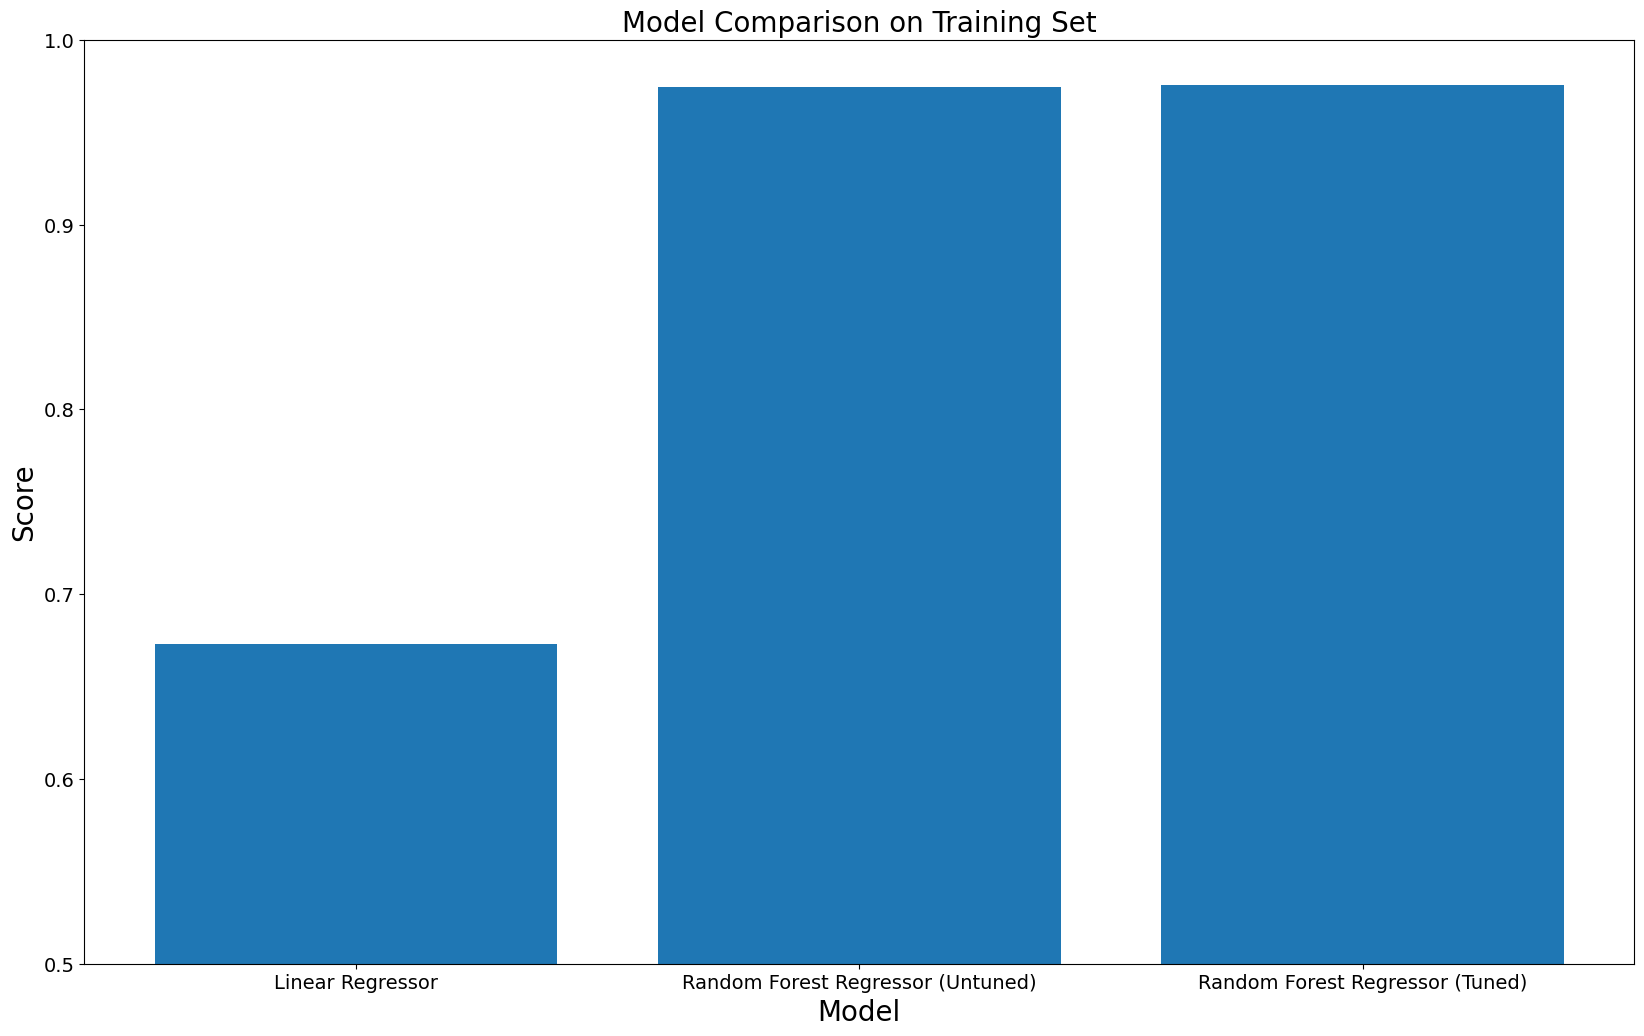

In [400]:
models = ['Linear Regressor', 'Random Forest Regressor (Untuned)', 'Random Forest Regressor (Tuned)']
scores_train = [regressor_score_train, forest_score_train, forest_score_train_tuned]

plot_model_comparison(models, scores_train, x_lim_low=0.5, x_lim_high=1.0)

### **Comparing Test Scores**

Again, the Linear Regressor performs significantly worse than the 2 Random Forest Classifiers. 
Again, the 2 Random Forest Regressors performs very similarly. 
In this case, the 2 Random Forest Regressors took a hit in their performance when verifying against the unseen test set. 
On the other hand, the Linear Regressor did not take much of a hit when evaluating its performance on the test set.

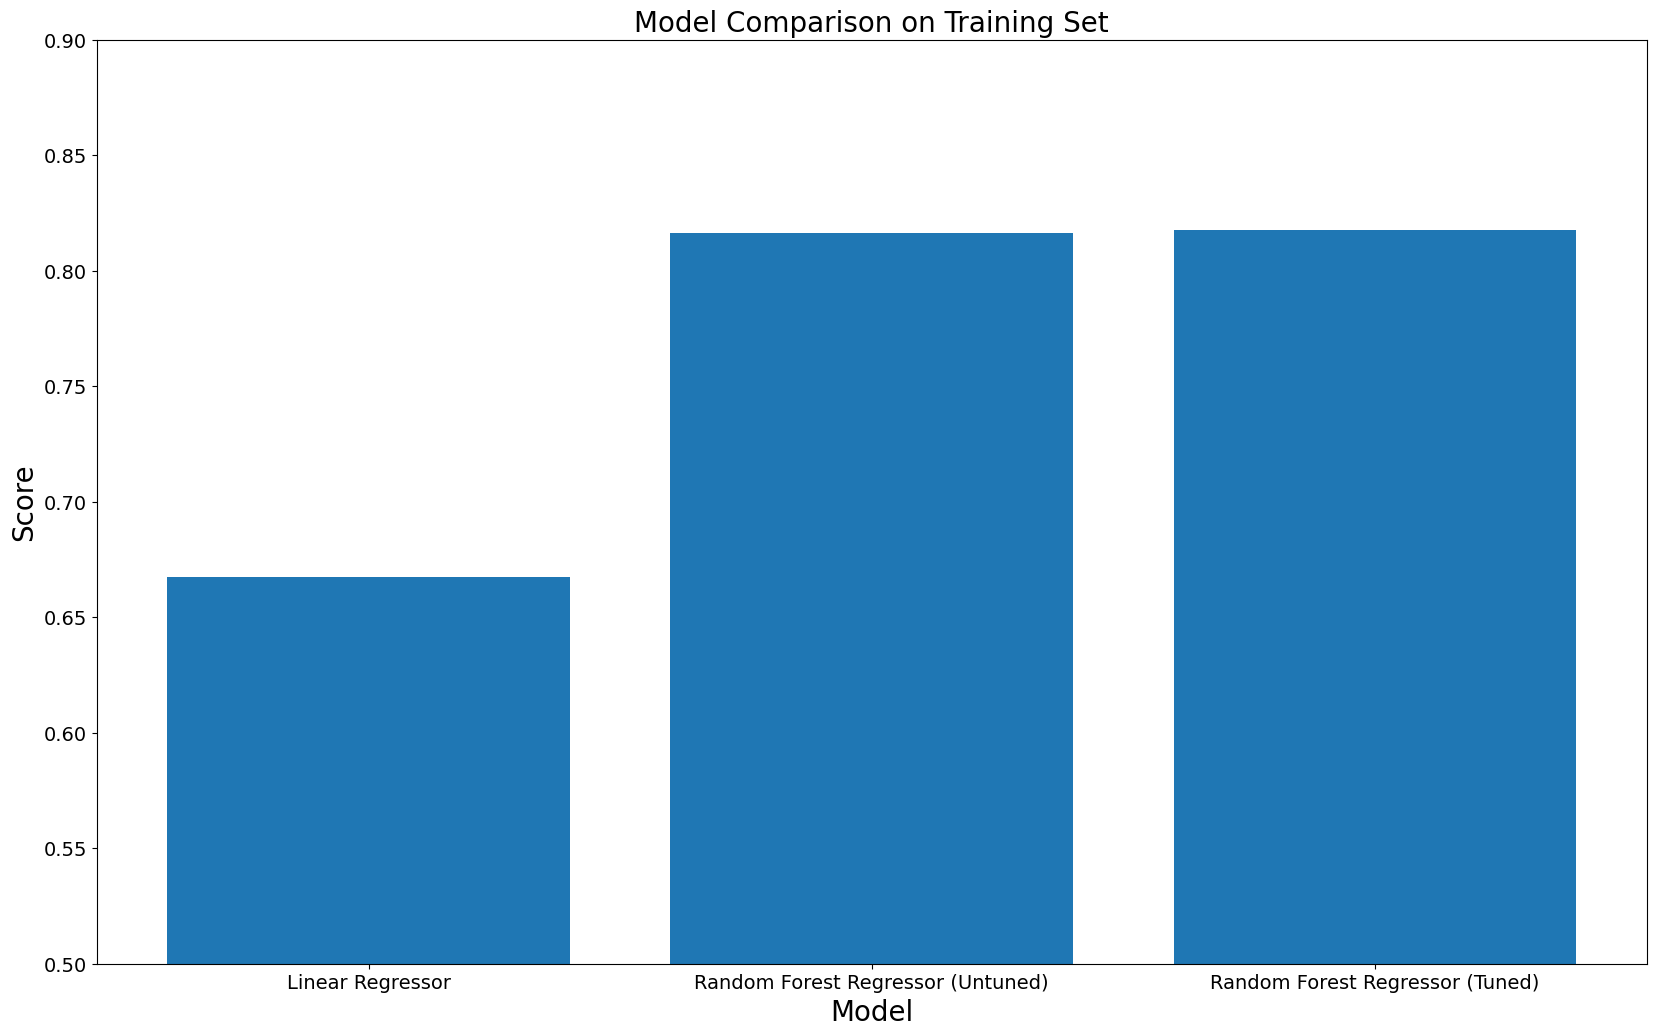

In [402]:
models = ['Linear Regressor', 'Random Forest Regressor (Untuned)', 'Random Forest Regressor (Tuned)']
scores_test = [regressor_score_test, forest_score_test, forest_score_test_tuned]

plot_model_comparison(models, scores_test, x_lim_low=0.5, x_lim_high=0.9)